1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.




In [1]:
#installing relevant librarires
%pip install numpy pandas matplotlib seaborn --upgrade --quiet 
print('completed')

Note: you may need to restart the kernel to use updated packages.
completed


In [2]:
%pip install opendatasets xgboost graphviz  scikit-learn --upgrade --quiet
print('completed')

Note: you may need to restart the kernel to use updated packages.
completed


# Data Download

In [3]:
import opendatasets as od


In [4]:
#Downloading Boston Housing data.

data_url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
od.download(data_url)

Using downloaded and verified file: .\housing.csv


In [5]:
data_url1='https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names'
od.download(data_url1)

Using downloaded and verified file: .\housing.names


# **Obtaining data information

**importing libraries for data visualisation

In [6]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
%matplotlib inline

In [7]:
housing_df=pd.read_csv('housing.csv',header=None)
housing_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [8]:
#Adding column names to our Data Frame
cols=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE', 'DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
housing_df.columns=[cols]

In [9]:
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [10]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (CRIM,)     506 non-null    float64
 1   (ZN,)       506 non-null    float64
 2   (INDUS,)    506 non-null    float64
 3   (CHAS,)     506 non-null    int64  
 4   (NOX,)      506 non-null    float64
 5   (RM,)       506 non-null    float64
 6   (AGE,)      506 non-null    float64
 7   (DIS,)      506 non-null    float64
 8   (RAD,)      506 non-null    int64  
 9   (TAX,)      506 non-null    float64
 10  (PTRATIO,)  506 non-null    float64
 11  (B,)        506 non-null    float64
 12  (LSTAT,)    506 non-null    float64
 13  (MEDV,)     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
housing_df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
housing_df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [14]:
#Obtain inputs and outputs
X=housing_df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE', 'DIS','RAD','TAX','PTRATIO','B','LSTAT',]]
y=housing_df[['MEDV']]

In [15]:
#Scaling numerical values
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [17]:
X=scaler.transform(X)

# Modelling using XGBoost

In [18]:
from xgboost import XGBRegressor
from xgboost import plot_importance

In [19]:
model=XGBRegressor()

In [20]:
model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

# Feature Importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

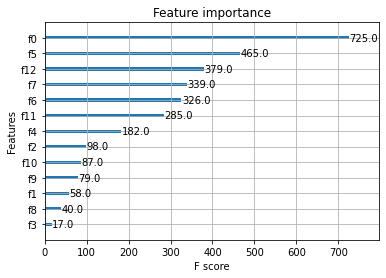

In [21]:
plot_importance(model)

Clearly, Crime rate is the most important feature,then average no. of rooms per building,then % lower status of the population,then weighted distances to five Boston employment centres,then age of owner occupied units builts prior 1940, then proportions of blacks, then Nitric Oxides concentration,then proportion of non-retail business acres per town ,then pupil teacher ratio, then property tax, then proportion of residential land zoned for lots over,then index of accessibility to radial highways,and lastly Charles River dummy variable


# Prediction

In [22]:
x_preds=model.predict(X)

# Evaluating Model

In [23]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [24]:
rmse(x_preds,y)

0.03798682173132399

# Visualization

In [25]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams
import graphviz

In [26]:
#plot_tree(model)
#plt.show()

# Hypermarameter tuning

In [27]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_val, train_targets, val_targets = train_test_split(X,y, test_size=0.1)

**We go about adjusting paramets to find the optimal values.


In [93]:
params = {'n_estimators':1000,
          'max_depth': 20,
          'learning_rate': 0.15,
          'subsample': 0.95,
          'colsample_bytree': 0.60,
          'reg_lambda': 1.50,
          'reg_alpha': 6.10,
          'gamma': 1.40,
          'random_state': 70,
         }

In [94]:
model1 = XGBRegressor(**params)
model1.fit(X_train, train_targets)
train_rmse = rmse(model1.predict(X_train), train_targets)
val_rmse = rmse(model1.predict(X_val), val_targets)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 0.7975734440818147, Validation RMSE: 2.8162338874026878


# Findings

1.Increasing n_estimators is good for our model
2. A higher random staTE IS GOOD FOR OUR MODEL


In [ ]:
**NB
According to Jason Brownlee PhD;

n_estimators: The number of trees in the ensemble, often increased until no further improvements are seen.
max_depth: The maximum depth of each tree, often values are between 1 and 10.
eta: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.
subsample: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.
colsample_bytree: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features.